In [ ]:
import pandas as pd
final = pd.read_csv("clustered_data_new.csv")
final.head()

,Store_Number,Item_Code,Item_Name,Retail_Price,Count_Week_Instock,Normalized_Sales_$L52W,Sales Bucket,Store_Name,Open_Date,Market_Name,...,Package_Type_1L,Package_Type_200-3gft,Package_Type_200ml,Package_Type_375ml,Package_Type_700ml,Package_Type_720ml,Package_Type_750gft,Package_Type_750ml,Count_Week_Instock_Normalized,Cluster_Label
0,2802,503010,Barton Vodka,6.99,52.0,4661.0,Sales included,2802 Overland Park,2023-07-26,Kansas City,...,1,0,0,0,0,0,0,0,1.00,3
1,2705,503010,Barton Vodka,6.49,52.0,100.0,Sales included,2705 Avon,2023-09-05,Indianapolis,...,1,0,0,0,0,0,0,0,1.00,3
2,2801,503010,Barton Vodka,7.49,39.0,NaN,Sales excluded for model test,2801 Wichita,2023-11-14,Wichita,...,1,0,0,0,0,0,0,0,0.75,3
3,802,503175,Barton Vodka,12.99,52.0,4689.0,Sales included,802\nKennesaw,2007-06-29,Georgia,...,0,0,0,0,0,0,0,0,1.00,3
4,2201,503175,Barton Vodka,13.99,52.0,3926.0,Sales included,2201\nWestbury,2017-11-03,Long Island,...,0,0,0,0,0,0,0,0,1.00,3


In [ ]:
print(final.columns.tolist())

['Store_Number', 'Item_Code', 'Item_Name', 'Retail_Price', 'Count_Week_Instock', 'Normalized_Sales_$L52W', 'Sales Bucket', 'Store_Name', 'Open_Date', 'Market_Name', 'Store_Address', 'Households', 'Perc_HH_Income_above100K', 'Median_HH_Income', 'Average_Net_Worth', 'Perc_Population_Bachelor_Degree', 'Perc_Hispanic', 'Perc_Asian', 'Perc_African_American', 'Perc_Population_Age_50-70', 'US Whiskey', 'Tequila Under $65', 'Tequila Over $65', 'Scotch Under $75', 'Scotch Over $75', 'Vodka', 'Cordials', 'Brandy Under $85', 'Brandy Over $85', 'Cabernet Under $20', 'Cabernet $20-50', 'Cabernet Over $50', 'Chardonnay Under $20', 'Chardonnay Over $20', 'Wine - Sparkling', 'Pinot Noir Under $20', 'Pinot Noir Over $20', 'Sauvignon Blanc', 'French Champagne', 'Market_Sales_L52wk', 'Count_Item_Location', 'Store_Age_Days', 'High_Education_High_Income', 'Diversity_Index', 'Age_Income_Ratio', 'Price_Per_Household', 'Vodka_Sales_Factor', 'Household_Income_to_NetWorth_Ratio', 'Household_Vodka_Factor', 'Educ

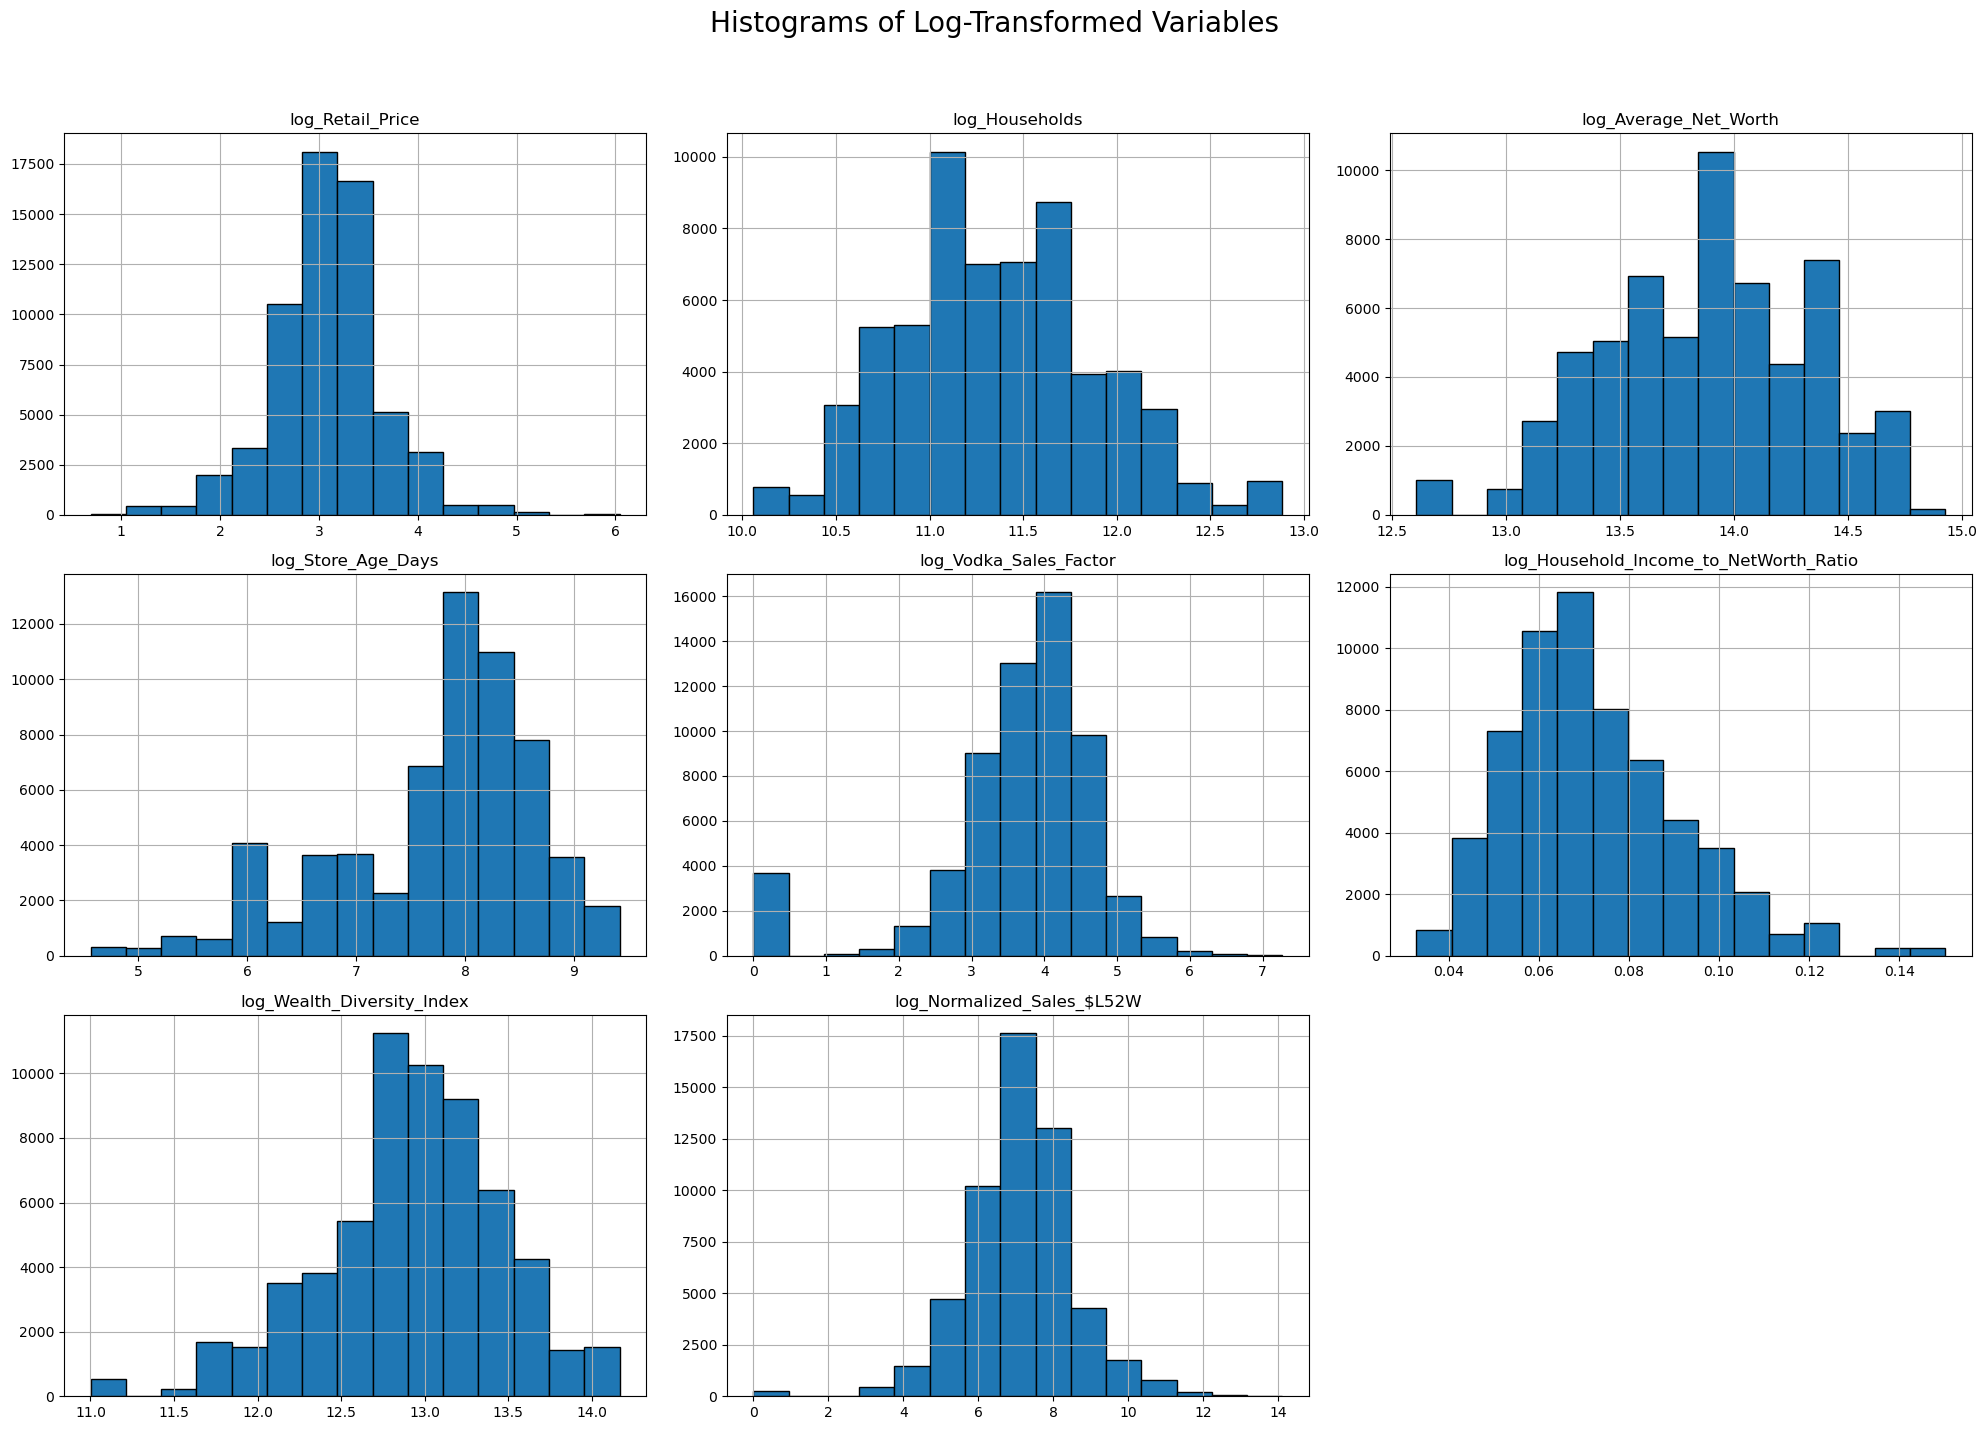

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# List of highly skewed variables to transform
skewed_columns = [
    'Retail_Price', 'Households', 'Average_Net_Worth', 'Store_Age_Days', 'Vodka_Sales_Factor', 'Household_Income_to_NetWorth_Ratio', 'Wealth_Diversity_Index', 'Normalized_Sales_$L52W'
]

for col in skewed_columns:
    # Adding 1 to avoid log(0) and applying log transform
    final['log_' + col] = np.log1p(final[col])

# Display histograms of log-transformed variables to verify distribution changes
final[[f'log_{col}' for col in skewed_columns]].hist(bins=15, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Log-Transformed Variables', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# List of columns to process
columns_to_engineer = [
    'US Whiskey', 'Tequila Under $65', 'Tequila Over $65',
    'Scotch Under $75', 'Scotch Over $75', 'Vodka', 'Cordials',
    'Brandy Under $85', 'Brandy Over $85', 'Cabernet Under $20', 'Cabernet $20-50', 'Cabernet Over $50', 'Chardonnay Under $20', 'Chardonnay Over $20', 'Wine - Sparkling', 'Pinot Noir Under $20', 'Pinot Noir Over $20', 'Sauvignon Blanc', 'French Champagne'
]

for col in columns_to_engineer:
    final[f'{col}_engineered'] = final[col] + 1


In [ ]:
final['Vodka_Tequila_Under_65_Ratio'] = final['Vodka_engineered']/final['Tequila Under $65_engineered']
final['Vodka_Tequila_Over_65_Ratio'] = final['Vodka_engineered']/final['Tequila Over $65_engineered']

In [ ]:
# Calculate the average wine value
wine_columns = [
    'Cabernet Under $20_engineered', 'Cabernet $20-50_engineered', 'Cabernet Over $50_engineered',
    'Chardonnay Under $20_engineered', 'Chardonnay Over $20_engineered', 'Wine - Sparkling_engineered',
    'Pinot Noir Under $20_engineered', 'Pinot Noir Over $20_engineered', 'Sauvignon Blanc_engineered',
    'French Champagne_engineered'
]

final['Average_Wine_Value'] = final[wine_columns].mean(axis=1)

# Create a binary variable
final['Vodka_Wine_Ratio'] = final['Vodka_engineered']/final['Average_Wine_Value']

In [ ]:
# "Spirits_Direct" for partnered brands
total_wine_partners = [
    "Tower Vodka", "Summum Vodka", "Hope Vodka", "Purity Vodka Connoisseur 51", "Classic Club Vodka",
    "The American Plains Vodka", "Froggy B Vodka", "Roberto Cavalli Vodka", "Akva Organic Swedish Vodka",
    "Gallant Vodka", "Opulent Vodka", "Veil Vodka", "Starr Blu Vodka", "Lyna Vodka", "Karkov Vodka",
    "Prairie Organic Vodka", "Pau Maui Handcrafted Vodka", "Eight Degrees Vodka", "Esme Black Shield Vodka",
    "Greenhouse Organic Vodka", "ABK6 Organic Vodka", "Ivanhalder's 1815 Vodka", "Stateside Urbancraft Vodka",
    "3 Howls Blood Orange Vodka"
]

# Create the 'Spirits_Direct' column and initialize it to 0
final['Spirits_Direct'] = 0

# Check if the 'Item_Name' column contains any partnered brand name
final['Spirits_Direct'] = final['Item_Name'].apply(
    lambda x: 1 if any(partner in str(x) for partner in total_wine_partners) else 0
)

In [ ]:
# List of common flavor keywords associated with flavored vodkas
flavor_keywords = [
    'Apple', 'Apricot', 'Berry', 'Blackberry', 'Blueberry', 'Cherry', 'Citrus', 'Coconut', 'Cranberry',
    'Grape', 'Grapefruit', 'Lemon', 'Lime', 'Mango', 'Melon', 'Orange', 'Peach', 'Pear', 'Pineapple',
    'Raspberry', 'Strawberry', 'Vanilla', 'Watermelon', 'Pepper', 'Chocolate', 'Espresso', 'Coffee',
    'Caramel', 'Honey', 'Cinnamon', 'Peppermint', 'Whipped', 'Cake', 'Marshmallow', 'Butterscotch',
    'vanilla', 'citrus', 'berry', 'peach', 'apple', 'lemon', 'lime', 'orange', 'raspberry',
    'strawberry', 'cherry', 'pineapple', 'mango', 'coconut', 'pepper', 'chocolate', 'caramel',
    'coffee', 'espresso', 'honey', 'ginger', 'melon', 'grape', 'pomegranate', 'watermelon',
    'cucumber', 'peppermint', 'cinnamon', 'spice', 'tea', 'mint', 'cake', 'whipped', 'cream',
    'butterscotch', 'toffee', 'hazelnut', 'almond', 'fig', 'apricot', 'pear', 'passion fruit',
    'kiwi', 'blueberry', 'blackberry', 'cranberry', 'grapefruit', 'tangerine', 'blood orange',
    'hibiscus', 'lavender', 'rose', 'elderflower', 'lychee', 'papaya', 'guava', 'dragonfruit',
    'acai', 'jalapeno', 'chipotle', 'sriracha', 'wasabi', 'bacon', 'smoked', 'maple', 'pumpkin',
    'smores', 'birthday cake', 'cotton candy', 'bubblegum', 'root beer', 'cola', 'gingerbread',
    'candy cane', 'sugar cookie', 'salted caramel', 'pecan', 'walnut', 'macadamia', 'pistachio',
    'chai', 'matcha', 'mocha', 'hazelnut', 'almond', 'butter', 'biscuit', 'cookie', 'brownie',
    'fudge', 'truffle', 'nougat', 'praline', 'marzipan', 'amaretto', 'tiramisu', 'baklava',
    'bakery', 'dessert', 'pastry', 'confection', 'sweet', 'sour', 'spicy', 'herb', 'botanical',
    'infusion', 'essence', 'extract', 'liqueur', 'cordial', 'schnapps'
]

# Create the 'Flavored_Vodka' column and initialize it to 0
final['Flavored_Vodka'] = 0

# Function to check if any flavor keyword is in the item name
def is_flavored_vodka(item_name):
    # Convert item name to string and check for each keyword
    return any(keyword.lower() in str(item_name).lower() for keyword in flavor_keywords)

# Apply the function to the 'Item_Name' column
final['Flavored_Vodka'] = final['Item_Name'].apply(is_flavored_vodka).astype(int)

In [ ]:
print(sorted(final['Item_Name'].unique()))

['10 Torr Vodka', '10th Mountain Vodka', '12.05 Vodka', '1220 Encrypted Vodka', '13th Colony Southern Vodka', '1852 Kurant Crystal Vodka', '1852 Kurant Gold Vodka', '1876 Pineapple Jalepeno Vodka', '1876 Vodka', '18th Street Vodka', '1911 Established Honeycrisp Vodka', '22 Salute Vodka', '25*80 Jalapeno Vodka', '25*80 Vodka', '25*80 Watermelon Pineapple Vodka', '2Nite Alpine Mint Vodka', '2Nite Blood Orange Vodka', '2Nite Espresso Vodka', '2Nite Peach Vodka', '2Nite Vodka', '2nd City Vodka', '3 Howls Blood Orange Vodka', '3 Howls Vodka', '360 Madagascar Vanilla Vodka', '360 Mandarin Orange Vodka', '360 Pineapple Vodka', '360 Red Raspberry Vodka', '360 Vodka', '360 Vodka Cherry', '360 Vodka Double Chocolate', '360 Vodka GA Peach', '360 Vodka Grape', '360 Vodka Huckleberry', '360 Vodka KC Barbeque', '360 Vodka Lime', '360 Vodka Orange Mandarin', '360 Vodka Raspberry', '360 Vodka Red Delicious Apple', '360 Vodka Sorrento Lemon', '42 Below Pure Vodka', '44 North Huckleberry Vodka', '44 Nor

In [ ]:
# Brand recognition
brand_keywords = [
    'Smirnoff', 'Absolut', 'Zubrowka', 'Magic Moments', 'Arkhangelskaya', 'Zoladkowa', 'Grey Goose', 'Soplica', 'Pyat Ozer',
    'Nemiroff', 'Belenkaya', 'Skyy', 'Talka', 'Ketel One', 'Finlandia', 'Russian Standard', 'Wodka Gorbatschow', 'Tsarskaya',
    'Imperial Collection Gold', 'Green Mark', 'Belaya Bereza'
]

# Create the 'Top20_Vodka' column and initialize it to 0
final['Top20_Vodka'] = 0

# Function to check if any brand keyword is in the item name
def is_top20_vodka(item_name):
    # Convert item name to string and check for each keyword
    return any(keyword.lower() in str(item_name).lower() for keyword in brand_keywords)

# Apply the function to the 'Item_Name' column
final['Top20_Vodka'] = final['Item_Name'].apply(is_top20_vodka).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Split the data into 'data' and 'pred' based on 'Sales Bucket'
data = final[final['Sales Bucket'] == 'Sales included']
pred = final[final['Sales Bucket'] == 'Sales excluded for model test']

# Define the features and target for 'data' (including dummy variables)
X = data[['Vodka', 'Store_Size_Extra Large',
          'Store_Size_Large', 'Store_Size_Medium', 'Store_Size_Small', 'Store_State_AZ', 'Store_State_CA',
          'Store_State_CO', 'Store_State_CT', 'Store_State_DE', 'Store_State_FL', 'Store_State_GA',
          'Store_State_IL', 'Store_State_IN', 'Store_State_KS', 'Store_State_KY', 'Store_State_LA',
          'Store_State_MA', 'Store_State_MD', 'Store_State_MI', 'Store_State_MN', 'Store_State_MO',
          'Store_State_NJ', 'Store_State_NM', 'Store_State_NV', 'Store_State_NY', 'Store_State_SC',
          'Store_State_TN', 'Store_State_TX', 'Store_State_WA', 'Store_State_WI', 'Package_Type_1.5L',
          'Package_Type_1.75L', 'Package_Type_1.75Lgft', 'Package_Type_100ml', 'Package_Type_1L',
          'Package_Type_200-3gft', 'Package_Type_200ml', 'Package_Type_375ml', 'Package_Type_700ml',
          'Package_Type_720ml', 'Package_Type_750gft', 'Package_Type_750ml', 'Count_Week_Instock_Normalized',
          'log_Retail_Price', 'log_Households',
          'log_Store_Age_Days',
          'Cluster_Label',
          'Vodka_Tequila_Under_65_Ratio', 'Vodka_Tequila_Over_65_Ratio','Vodka_Wine_Ratio',
          'Spirits_Direct',
          'Flavored_Vodka',
          'Top20_Vodka'
          ]]

y = data['log_Normalized_Sales_$L52W']  # Use the original target variable

# Split 'data' into training + validation (90%) and holdout (10%)
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(X, y, test_size=0.1, random_state=2424)

# Split the training + validation set into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=2424)

# Define the pipeline with scaling for numerical features
numerical_features = X.columns  # Assumes all columns are numerical or pre-dummy encoded

preprocessor = StandardScaler()

# Lasso regression pipeline
lasso_pipeline = Pipeline(steps=[
    ('scaler', preprocessor),
    ('lasso', LassoCV(cv=5, max_iter=10000))
])

# Fit the Lasso regression model on training data
lasso_pipeline.fit(X_train, y_train)

# Print model performance on training and validation sets
print("Lasso Regression Model Performance:")
print("Training Score:", lasso_pipeline.score(X_train, y_train))
print("Validation Score:", lasso_pipeline.score(X_val, y_val))

Lasso Regression Model Performance:
Training Score: 0.2893007187164681
Validation Score: 0.2683142199038252


In [ ]:
# Get the coefficients of the Lasso model
lasso_coefficients = lasso_pipeline.named_steps['lasso'].coef_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_coefficients
})

# Filter to show only non-zero coefficients, which are the features selected by Lasso
non_zero_importance = feature_importance[feature_importance['Coefficient'] != 0]

# Sort by absolute coefficient value in descending order to see the most important features at the top
non_zero_importance = non_zero_importance.reindex(non_zero_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Display feature importance
print(non_zero_importance)

                          Feature  Coefficient
43  Count_Week_Instock_Normalized     0.322919
52                 Flavored_Vodka    -0.304739
32             Package_Type_1.75L     0.282974
53                    Top20_Vodka     0.235908
38             Package_Type_375ml    -0.178903
46             log_Store_Age_Days     0.172069
47                  Cluster_Label     0.125074
44               log_Retail_Price     0.115673
33          Package_Type_1.75Lgft     0.111779
6                  Store_State_CA    -0.107911
37             Package_Type_200ml    -0.094947
41            Package_Type_750gft     0.086707
50               Vodka_Wine_Ratio     0.085910
35                Package_Type_1L     0.084641
16                 Store_State_LA     0.073576
0                           Vodka     0.068917
19                 Store_State_MI     0.067382
25                 Store_State_NY     0.051713
51                 Spirits_Direct    -0.051663
48   Vodka_Tequila_Under_65_Ratio    -0.048757
10           

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def print_evaluation_metrics(y_true, y_pred, set_name="Evaluation"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{set_name} RMSE: {rmse:.4f}")
    print(f"{set_name} MAE: {mae:.4f}")

y_val_pred = lasso_pipeline.predict(X_val)

print_evaluation_metrics(y_val, y_val_pred, set_name="Validation")

Validation RMSE: 1.2191
Validation MAE: 0.8884


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data = final[final['Sales Bucket'] == 'Sales included']
pred = final[final['Sales Bucket'] == 'Sales excluded for model test']

X = data[['Vodka', 'Store_Size_Extra Large',
          'Store_Size_Large', 'Store_Size_Medium', 'Store_Size_Small', 'Store_State_AZ', 'Store_State_CA',
          'Store_State_CO', 'Store_State_CT', 'Store_State_DE', 'Store_State_FL', 'Store_State_GA',
          'Store_State_IL', 'Store_State_IN', 'Store_State_KS', 'Store_State_KY', 'Store_State_LA',
          'Store_State_MA', 'Store_State_MD', 'Store_State_MI', 'Store_State_MN', 'Store_State_MO',
          'Store_State_NJ', 'Store_State_NM', 'Store_State_NV', 'Store_State_NY', 'Store_State_SC',
          'Store_State_TN', 'Store_State_TX', 'Store_State_WA', 'Store_State_WI', 'Package_Type_1.5L',
          'Package_Type_1.75L', 'Package_Type_1.75Lgft', 'Package_Type_100ml', 'Package_Type_1L',
          'Package_Type_200-3gft', 'Package_Type_200ml', 'Package_Type_375ml', 'Package_Type_700ml',
          'Package_Type_720ml', 'Package_Type_750gft', 'Package_Type_750ml', 'Count_Week_Instock_Normalized',
          'log_Retail_Price', 'log_Households',
          'log_Store_Age_Days',
          'Cluster_Label',
          'Vodka_Tequila_Under_65_Ratio', 'Vodka_Tequila_Over_65_Ratio','Vodka_Wine_Ratio',
          'Spirits_Direct'
          ]]
y = data['log_Normalized_Sales_$L52W']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2424)

# Define the pipeline with scaling for numerical features
preprocessor = StandardScaler()

# Linear regression pipeline
linear_pipeline = Pipeline(steps=[
    ('scaler', preprocessor),
    ('linear', LinearRegression())
])

# Fit the linear regression model on training data
linear_pipeline.fit(X_train, y_train)

# Print model performance on training and validation sets
print("Linear Regression Model Performance:")
print("Training Score (R^2):", linear_pipeline.score(X_train, y_train))
print("Validation Score (R^2):", linear_pipeline.score(X_val, y_val))

# Calculate predictions for evaluation metrics
y_pred = linear_pipeline.predict(X_val)
print("Validation RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("Validation MAE:", mean_absolute_error(y_val, y_pred))

Linear Regression Model Performance:
Training Score (R^2): 0.221948787020682
Validation Score (R^2): 0.20964375498253518
Validation RMSE: 1.2698407881695486
Validation MAE: 0.9230403491721098


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the validation set (log scale)
y_log_pred = linear_pipeline.predict(X_val)

# Transform predictions and true values back to the original scale
y_pred_original = np.expm1(y_log_pred)
y_val_original = np.expm1(y_val)

# Calculate RMSE and MAE on the original scale
rmse_original = mean_squared_error(y_val_original, y_pred_original, squared=False)
mae_original = mean_absolute_error(y_val_original, y_pred_original)

# Print accuracy metrics on the original scale
print("Validation RMSE (Original Scale):", rmse_original)
print("Validation MAE (Original Scale):", mae_original)

# Optionally calculate R^2 on the original scale
ss_total = np.sum((y_val_original - np.mean(y_val_original))**2)
ss_residual = np.sum((y_val_original - y_pred_original)**2)
r2_original = 1 - (ss_residual / ss_total)
print("Validation R^2 (Original Scale):", r2_original)


Validation RMSE (Original Scale): 17731.224694677006
Validation MAE (Original Scale): 3301.380541959792
Validation R^2 (Original Scale): -0.001441194238373189


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into 'data' and 'pred' based on 'Sales Bucket'
data = final[final['Sales Bucket'] == 'Sales included']
pred = final[final['Sales Bucket'] == 'Sales excluded for model test']

# Define the features and target for 'data' (including dummy variables)
X = data[['Vodka', 'Store_Size_Extra Large',
          'Store_Size_Large', 'Store_Size_Medium', 'Store_Size_Small', 'Store_State_AZ', 'Store_State_CA',
          'Store_State_CO', 'Store_State_CT', 'Store_State_DE', 'Store_State_FL', 'Store_State_GA',
          'Store_State_IL', 'Store_State_IN', 'Store_State_KS', 'Store_State_KY', 'Store_State_LA',
          'Store_State_MA', 'Store_State_MD', 'Store_State_MI', 'Store_State_MN', 'Store_State_MO',
          'Store_State_NJ', 'Store_State_NM', 'Store_State_NV', 'Store_State_NY', 'Store_State_SC',
          'Store_State_TN', 'Store_State_TX', 'Store_State_WA', 'Store_State_WI', 'Package_Type_1.5L',
          'Package_Type_1.75L', 'Package_Type_1.75Lgft', 'Package_Type_100ml', 'Package_Type_1L',
          'Package_Type_200-3gft', 'Package_Type_200ml', 'Package_Type_375ml', 'Package_Type_700ml',
          'Package_Type_720ml', 'Package_Type_750gft', 'Package_Type_750ml', 'Count_Week_Instock_Normalized',
          'log_Retail_Price', 'log_Households',
          'log_Store_Age_Days',
          'Cluster_Label',
          'Vodka_Tequila_Under_65_Ratio', 'Vodka_Tequila_Over_65_Ratio', 'Vodka_Wine_Ratio',
          'Spirits_Direct',
          'Flavored_Vodka',
          'Top20_Vodka'
          ]]
y = data['Normalized_Sales_$L52W']

# Split 'data' into training + validation (90%) and holdout (10%)
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(X, y, test_size=0.1, random_state=2424)

# Split the training + validation set into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=2424)

# Initialize the XGBoost regressor
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=2424
)

# Train the model
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=2424, ...)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on training, validation, and holdout sets
y_train_pred = xgboost_model.predict(X_train)
y_val_pred = xgboost_model.predict(X_val)
y_holdout_pred = xgboost_model.predict(X_holdout)

# Calculate RMSE and MAE for training, validation, and holdout sets
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
holdout_rmse = mean_squared_error(y_holdout, y_holdout_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
holdout_mae = mean_absolute_error(y_holdout, y_holdout_pred)

# Calculate R² for training, validation, and holdout sets
train_r2 = xgboost_model.score(X_train, y_train)
val_r2 = xgboost_model.score(X_val, y_val)
holdout_r2 = xgboost_model.score(X_holdout, y_holdout)

# Print metrics
print("XGBoost Model Performance:")
print(f"Training RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}, MAE: {val_mae:.4f}, R²: {val_r2:.4f}")
print(f"Holdout RMSE: {holdout_rmse:.4f}, MAE: {holdout_mae:.4f}, R²: {holdout_r2:.4f}")

XGBoost Model Performance:
Training RMSE: 7065.8223, MAE: 2562.0306, R²: 0.8063
Validation RMSE: 14446.5698, MAE: 3123.3727, R²: 0.4434
Holdout RMSE: 13715.1774, MAE: 3240.6414, R²: 0.4631
